**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from scipy import stats

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import xgboost as xg

**Reading Dataset**

In [ ]:
df = pd.read_csv("Sample_for_BI.csv")
df.shape

(9240, 15)

In [ ]:
df.head()

,ID,Country,Specialization,How did you hear about Us,Current_Occupation,What matters most to you in choosing a course,Origin,Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Purchased
0,1,Russia,Business Administration,Word Of Mouth,Unemployed,Better Career Prospects,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,No
1,2,India,NaN,NaN,Unemployed,Better Career Prospects,API,Organic Search,No,No,5.0,674,2.5,Email Opened,No
2,3,India,Business Administration,NaN,Student,Better Career Prospects,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,Yes
3,4,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,No
4,5,India,NaN,Other,Unemployed,Better Career Prospects,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Yes


**Observations:**

* The Dataset has 9240 Rows and 15 Columns

**Getting Datatypes of each feature**

In [ ]:
df.dtypes

ID                                                 int64
Country                                           object
Specialization                                    object
How did you hear about Us                         object
Current_Occupation                                object
What matters most to you in choosing a course     object
Origin                                            object
Source                                            object
Do Not Email                                      object
Do Not Call                                       object
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Purchased                                         object
dtype: object

Observations:

* Out of 15 columns, 11 features/columns are categorical including the target variable.
* 4 columns are continuous


Checking Unique Value Count of each feature

In [ ]:
df["Origin"].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [ ]:
len(df.columns)

15

In [ ]:
df.columns

Index(['ID', 'Country', 'Specialization', 'How did you hear about Us',
       'Current_Occupation', 'What matters most to you in choosing a course',
       'Origin', 'Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Purchased'],
      dtype='object')

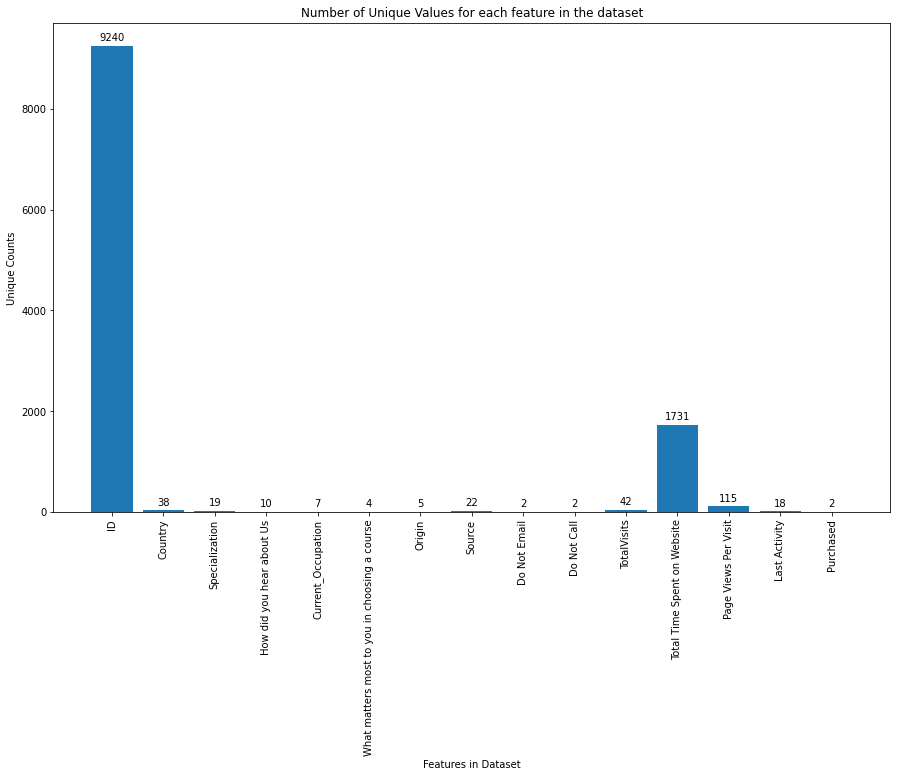

In [ ]:
columns = df.columns
counts = [len(df['ID'].unique()),len(df['Country'].unique()),len(df['Specialization'].unique()),len(df['How did you hear about Us'].unique()),
          len(df['Current_Occupation'].unique()),len(df['What matters most to you in choosing a course'].unique()),len(df['Origin'].unique()),
          len(df['Source'].unique()),len(df['Do Not Email'].unique()),len(df['Do Not Call'].unique()), len(df['TotalVisits'].unique()), 
          len(df['Total Time Spent on Website'].unique()),len(df['Page Views Per Visit'].unique()), len(df['Last Activity'].unique()), 
          len(df['Purchased'].unique())]
fig, ax = plt.subplots(figsize=(15,9))
ax.set_ylabel('Unique Counts')
ax.set_xlabel('Features in Dataset')
ax.set_title('Number of Unique Values for each feature in the dataset')
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns,rotation=90)

bars = ax.bar(np.arange(len(columns)), counts)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

**Number of missing values in the dataset**

In [ ]:
df.isna().sum()

ID                                                  0
Country                                          2465
Specialization                                   3379
How did you hear about Us                        7249
Current_Occupation                               2690
What matters most to you in choosing a course    2709
Origin                                              0
Source                                             36
Do Not Email                                        0
Do Not Call                                         0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Purchased                                           0
dtype: int64

**Observations:**

* Out of 15 features, 5 features have no missing values.
* 5 features have missing values>1000.
* 3 features have missing values>100.
* 1 feature have missing values<100.

**Imputing Missing Values**

**Using Mode and Median Imputation**

* For Country

In [ ]:
df['Country']=df['Country'].fillna(df['Country'].mode()[0])
df['Country'].isna().sum()

0

* Specialization

In [ ]:
df['Specialization']=df['Specialization'].fillna(df['Specialization'].mode()[0])
df['Specialization'].isna().sum()

0

* How did you hear about Us

In [ ]:
df['How did you hear about Us']=df['How did you hear about Us'].fillna(df['How did you hear about Us'].mode()[0])
df['How did you hear about Us'].isna().sum()

0

* Current Occupation

In [ ]:
df['Current_Occupation']=df['Current_Occupation'].fillna(df['Current_Occupation'].mode()[0])
df['Current_Occupation'].isna().sum()

0

* What matters most to you in choosing a course

In [ ]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0])
df['What matters most to you in choosing a course'].isna().sum()

0

* Total Visits

In [ ]:
df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].median())
df['TotalVisits'].isna().sum()

0

* Page Views Per Visit

In [ ]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())
df['Page Views Per Visit'].isna().sum()

0

* Last Activity

In [ ]:
df['Last Activity']=df['Last Activity'].fillna(df['Last Activity'].mode()[0])
df['Last Activity'].isna().sum()

0

# EDA

**Class Distribution**

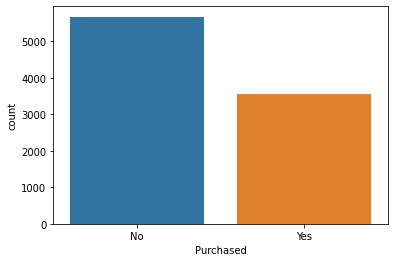

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create the countplot
ax = sns.countplot(data=df, x='Purchased')

**Observations**

* Our Data is almost balanced.
* Over 5000 users have not done purchased yet.
* 3000 users are done with their purchasing

**Top 10 Countries For Purchasing**

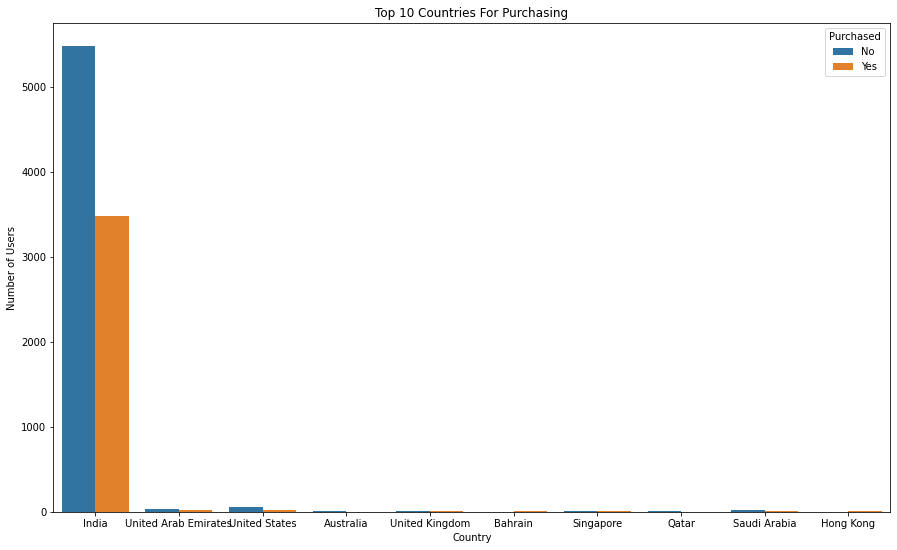

In [ ]:
import seaborn as sns

# Assuming your DataFrame is called 'df' and the column containing the city names is called 'City'
# and class label column is called 'class_label'

# Get the top 10 cities
# Create the countplot
plt.figure(figsize=(15, 9))
top_10 = df['Country'].value_counts().nlargest(10).index
# Create a new DataFrame with only the top 10 cities
top_10_df = df[df['Country'].isin(top_10)]
sns.countplot(data=top_10_df, x='Country', hue='Purchased')

# Add a title and labels
plt.title("Top 10 Countries For Purchasing")
plt.xlabel("Country")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations:**

* Since the dataset has 38 unique countries which will be difficult for us to get an insight about the data, we have narrowed down to top 10 countries in order to get a better visualization and insight.
* India has the highest purchasers as well as non-purchasers, followed by UAE and USA out of top 10 countries.
* Hong Kong has the least purchasers as well as non-purchasers, out of top 10 countries

**Top 10 Specializations For Purchasing**

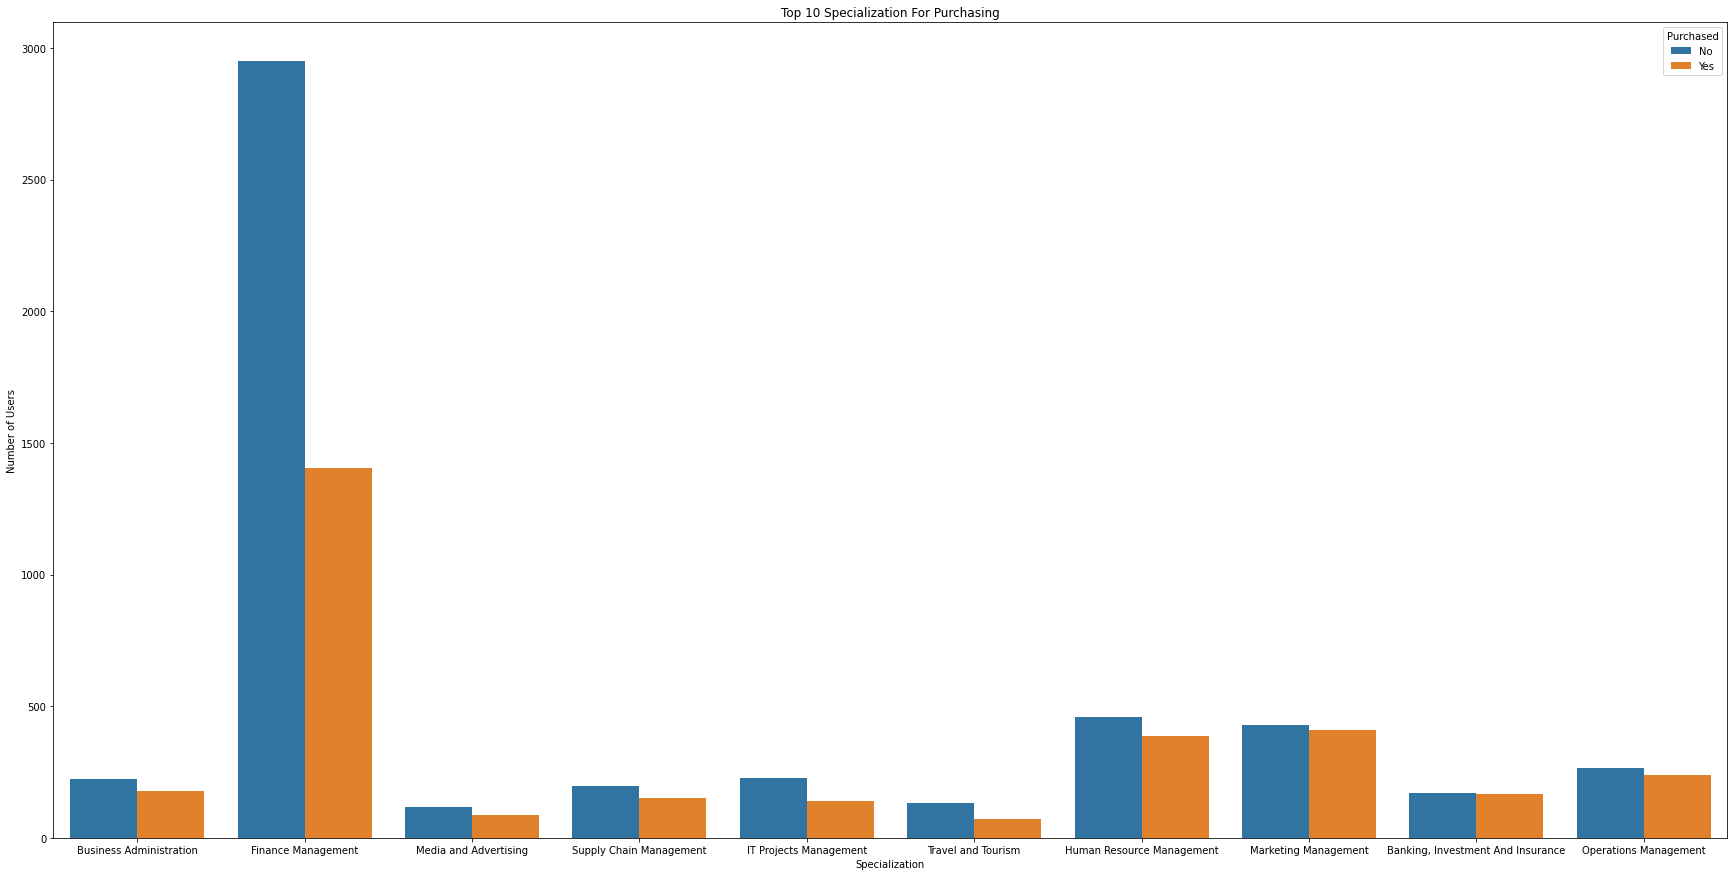

In [ ]:
# Assuming your DataFrame is called 'df' and the column containing the city names is called 'City'
# and class label column is called 'class_label'

# Get the top 10 cities
# Create the countplot
plt.figure(figsize=(30, 15))
top_10 = df['Specialization'].value_counts().nlargest(10).index
# Create a new DataFrame with only the top 10 cities
top_10_df = df[df['Specialization'].isin(top_10)]
sns.countplot(data=top_10_df, x='Specialization', hue='Purchased')

# Add a title and labels
plt.title("Top 10 Specialization For Purchasing")
plt.xlabel("Specialization")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations:**
* Since the dataset has 19 unique specializations which will be difficult for us to get an insight about the data, we have narrowed down to top 10 specializations in order to get a better visualization and insight.
* Finance Management has the highest purchasers as well as non-purchasers, followed by Marketing Management and HR Management out of top 10 countries.
* Media and Advertising has the least purchasers as well as non-purchasers, out of top 10 specializations.

**Referrals For Purchasing**

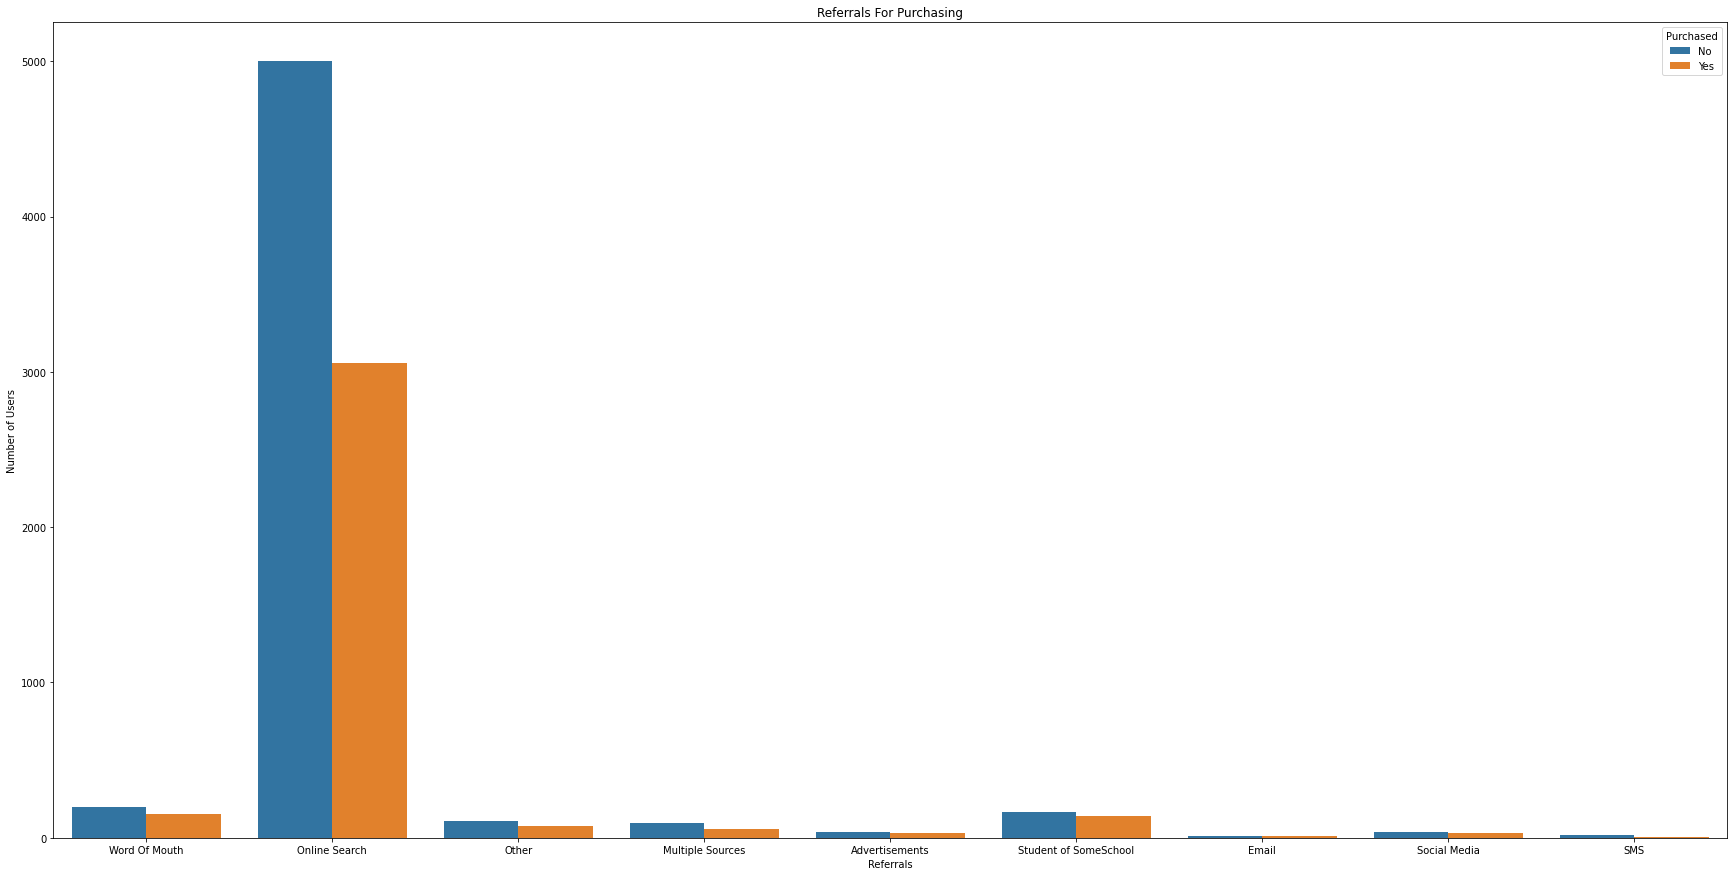

In [ ]:
plt.figure(figsize=(30, 15))
sns.countplot(data=df, x='How did you hear about Us', hue='Purchased')

# Add a title and labels
plt.title("Referrals For Purchasing")
plt.xlabel("Referrals")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations**

* Online Search has the highest purchasers as well as non-purchasers, followed by Word of Mouth and Student of Some School.
* SMS has the least purchasers as well as non-purchasers.

**Occupations for purchasers**

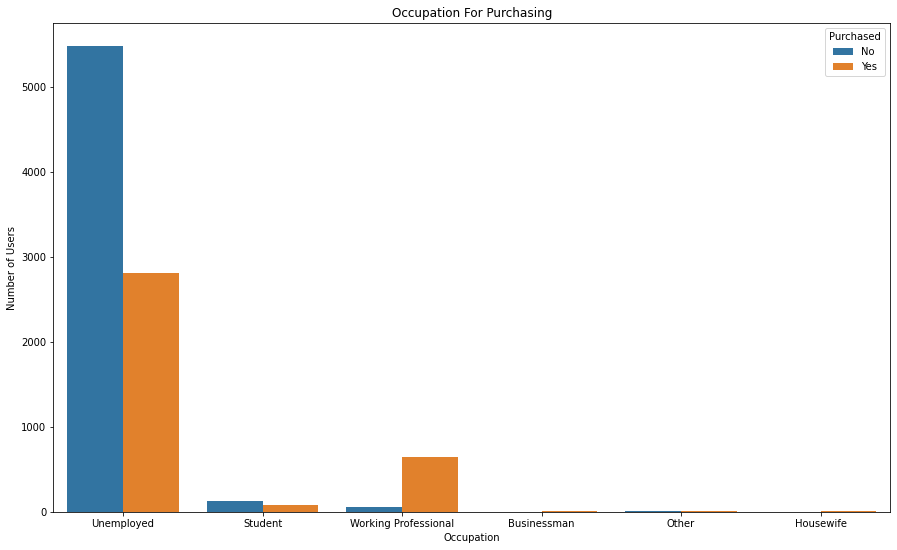

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(data=df, x='Current_Occupation', hue='Purchased')

# Add a title and labels
plt.title("Occupation For Purchasing")
plt.xlabel("Occupation")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations**

* Unemployed people are the highest purchasers as well as non-purchasers, followed by Student and Working Professional.
* People who are businessman are least purchasers as well as non-purchasers.

**Last Activity for purchasers**

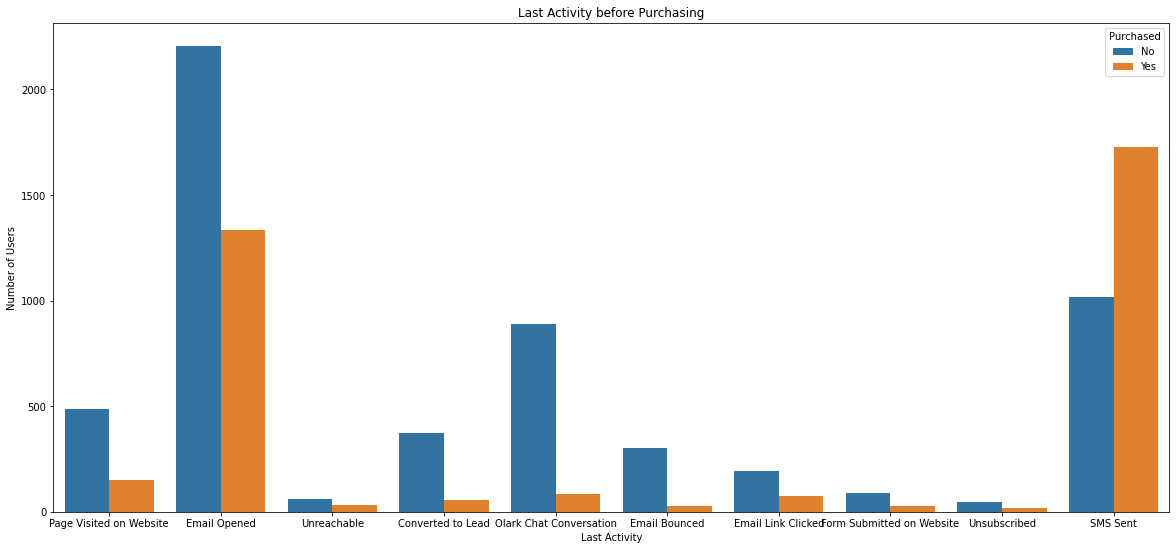

In [ ]:
plt.figure(figsize=(20, 9))
top_10 = df['Last Activity'].value_counts().nlargest(10).index
# Create a new DataFrame with only the top 10 cities
top_10_df = df[df['Last Activity'].isin(top_10)]
sns.countplot(data=top_10_df, x='Last Activity', hue='Purchased')
# Add a title and labels
plt.title("Last Activity before Purchasing")
plt.xlabel("Last Activity")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations:**

* Most of the purchasers have viewed their email and sms as the last activity before purchase.
* They might be viewing acknowledgement email or sms of their successful purchase.

**What matters to the users for purchasing**

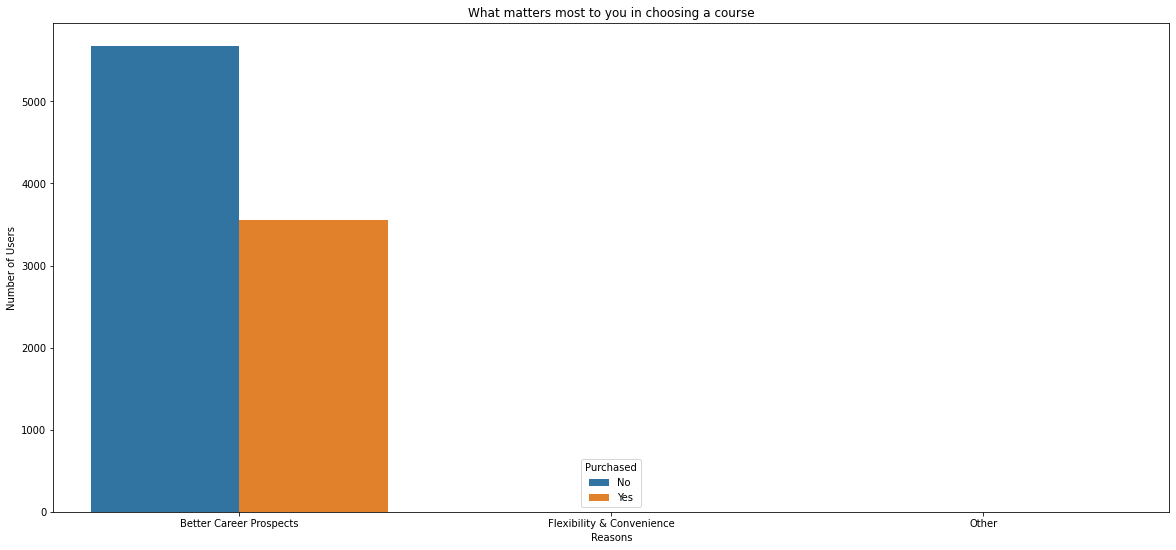

In [ ]:
plt.figure(figsize=(20, 9))
sns.countplot(data=df, x='What matters most to you in choosing a course', hue='Purchased')
# Add a title and labels
plt.title("What matters most to you in choosing a course")
plt.xlabel("Reasons")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations:**

* In order to choose a course, a Better Career Prospects matters most to the purchasers.
* Most of the people purchased the code to have Better Career Prospects.


**Orgin of Purchasers**

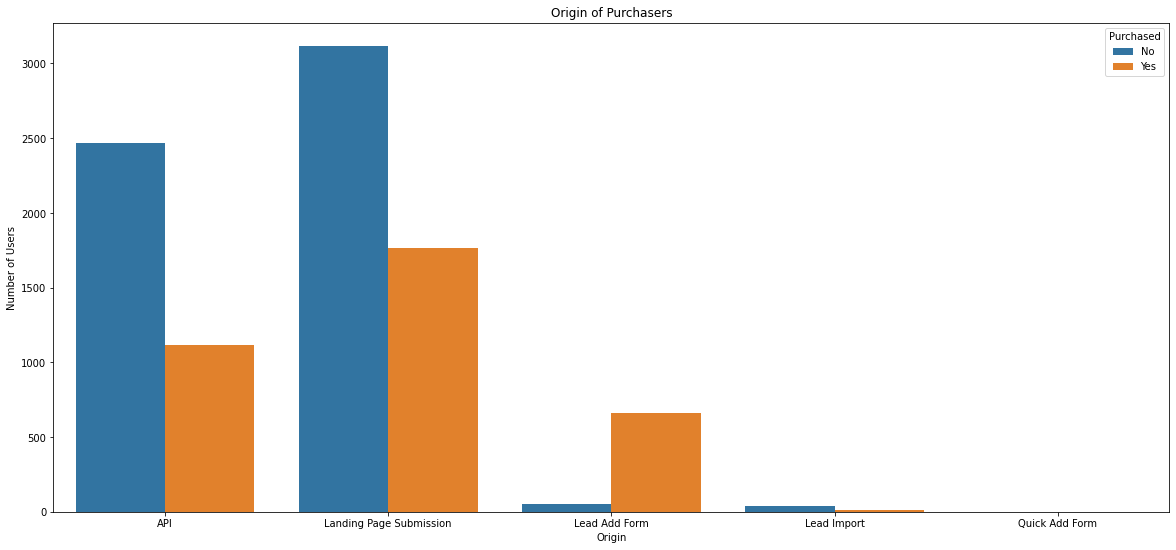

In [ ]:
plt.figure(figsize=(20, 9))
sns.countplot(data=df, x='Origin', hue='Purchased')
# Add a title and labels
plt.title("Origin of Purchasers")
plt.xlabel("Origin")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations:**
* Most of the purchasers originated from Landing Page Submission(Page where a user is sent after clicking the ad), followed by API(Website) and Lead Add Form(Sales lead referred user).
* People who originated from Quick Add Form(Google form) are less likely to become purchasers

**Top 10 Source of Purchasers(What website do they come from)**

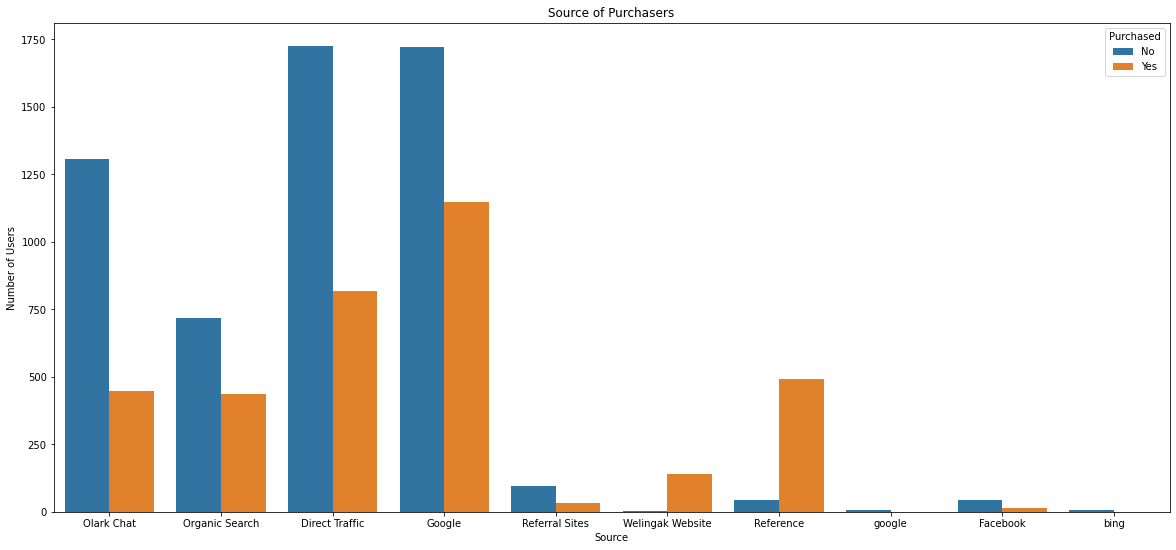

In [ ]:
plt.figure(figsize=(20, 9))
top_10 = df['Source'].value_counts().nlargest(10).index
# Create a new DataFrame with only the top 10 cities
top_10_df = df[df['Source'].isin(top_10)]
sns.countplot(data=top_10_df, x='Source', hue='Purchased')
# Add a title and labels
plt.title("Source of Purchasers")
plt.xlabel("Source")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

**Observations:**

* Most of the purchasers have come from the Google, followed by Direct Traffic, Reference, Olark Chat and Organic Search.
* People who come from google, Facebook and bing are least likely to become purchasers.


**Purchasers who don't like reaching out to email**

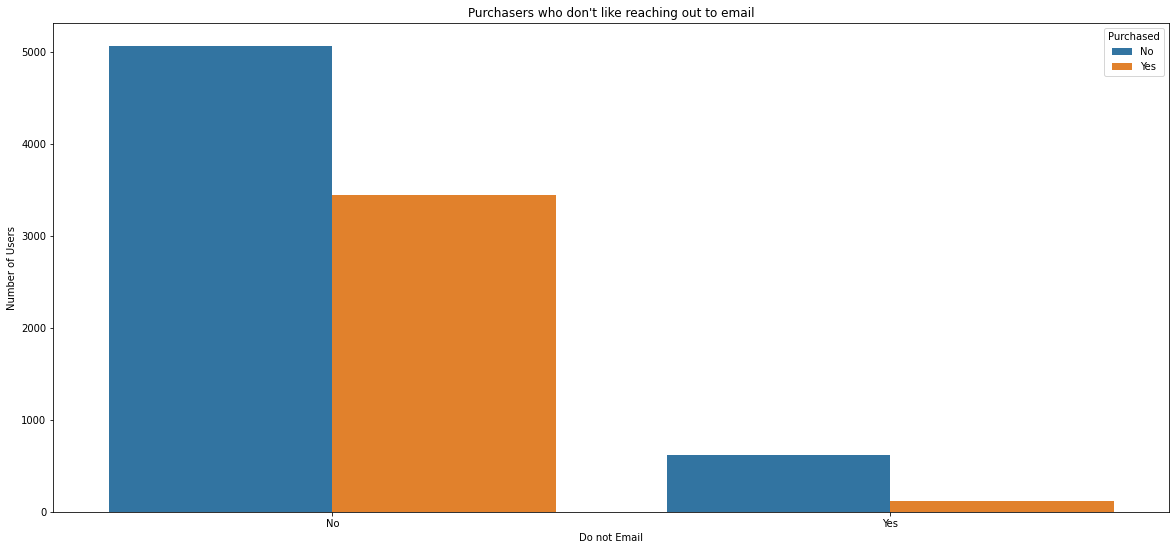

In [ ]:
plt.figure(figsize=(20, 9))
sns.countplot(data=df, x='Do Not Email', hue='Purchased')
# Add a title and labels
plt.title("Purchasers who don't like reaching out to email")
plt.xlabel("Do not Email")
plt.ylabel("Number of Users")
# Show the plot
plt.show()

**Observations:**

* People who would like to receive emails are most likely to become purchasers.
* People who would not like to receive emails are less likely to become purchasers.

**Purchasers who don't like reaching out to calls**

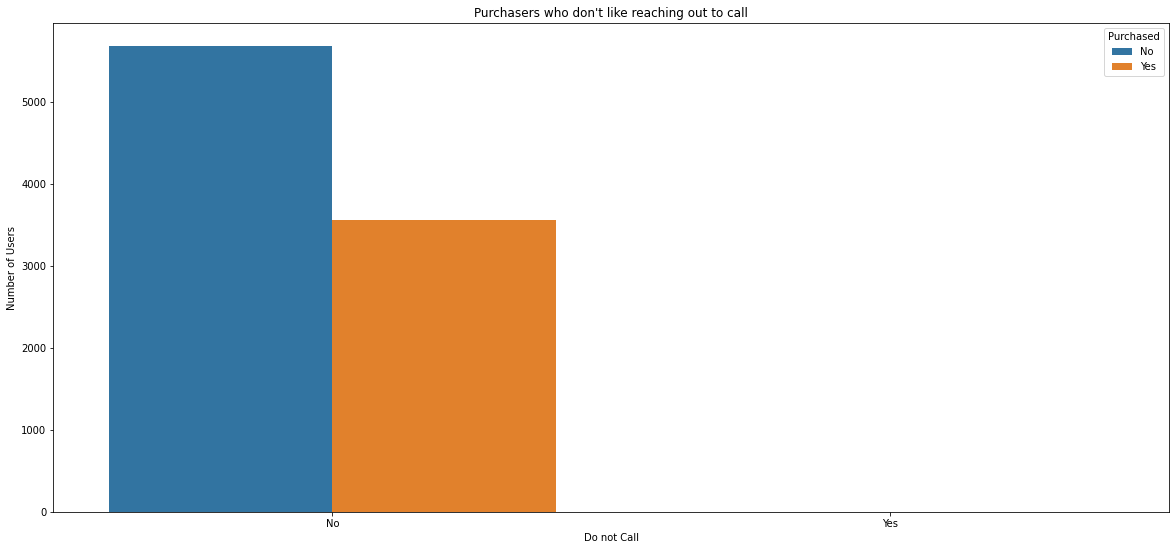

In [ ]:
plt.figure(figsize=(20, 9))
sns.countplot(data=df, x='Do Not Call', hue='Purchased')
# Add a title and labels
plt.title("Purchasers who don't like reaching out to call")
plt.xlabel("Do not Call")
plt.ylabel("Number of Users")
# Show the plot
plt.show()

**Observations:**

* People who would like to receive calls are most likely to become purchasers.
* People who would not like to receive calls are less likely to become purchasers.

**Total Visits of Purchaser**

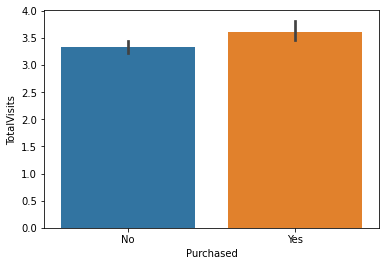

In [ ]:
sns.barplot(x='Purchased',y='TotalVisits',data=df)

**Observations:**
* If the user has totally visited the website more than 3.5 number of times, he will more likely become a purchaser 

**Total Time Spent on Website by Purchaser**

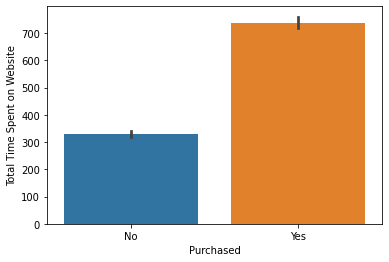

In [ ]:
sns.barplot(x='Purchased',y='Total Time Spent on Website',data=df)

**Observations**

* People who have spent more than 300 seconds on the website are more likely to become purchaser

## Model Building

**Dropping Id Feature**

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

**Splitting Dependent and Independent Features**

In [ ]:
x=df.drop(['Purchased'],axis=1)
print(x.columns)
y=df['Purchased']
print(y)

Index(['Country', 'Specialization', 'How did you hear about Us',
       'Current_Occupation', 'What matters most to you in choosing a course',
       'Origin', 'Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity'],
      dtype='object')
0        No
1        No
2       Yes
3        No
4       Yes
       ... 
9235    Yes
9236     No
9237     No
9238    Yes
9239    Yes
Name: Purchased, Length: 9240, dtype: object


**Encoding Categorical Features**

* Country

In [ ]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
x['Country']= lec.fit_transform(x['Country'])
x['Country'].unique()

array([24, 12, 16, 21, 33, 35,  1, 34,  2, 10, 26, 23, 25,  4,  8, 28,  6,
        5, 19, 29, 20, 11,  9,  0, 32, 15, 14, 27, 31, 18, 17, 30,  7, 22,
        3, 36, 13])

* Specialization

In [ ]:
les = LabelEncoder()
x['Specialization']= les.fit_transform(x['Specialization'])
x['Specialization'].unique()

array([ 1,  4, 11, 16,  8, 17,  7, 10,  0,  9,  3, 12, 13, 15,  6, 14,  5,
        2])

* How did you hear about Us

In [ ]:
leh = LabelEncoder()
x['How did you hear about Us']= leh.fit_transform(x['How did you hear about Us'])
x['How did you hear about Us'].unique()

array([8, 3, 4, 2, 0, 7, 1, 6, 5])

* Current_Occupation

In [ ]:
leco = LabelEncoder()
x['Current_Occupation']= leco.fit_transform(x['Current_Occupation'])
x['Current_Occupation'].unique()

array([4, 3, 5, 0, 2, 1])

* What matters most to you in choosing a course

In [ ]:
lew = LabelEncoder()
x['What matters most to you in choosing a course']= lew.fit_transform(x['What matters most to you in choosing a course'])
x['What matters most to you in choosing a course'].unique()

array([0, 1, 2])

* Origin

In [ ]:
leo = LabelEncoder()
x['Origin']= leo.fit_transform(x['Origin'])
x['Origin'].unique()

array([0, 1, 2, 3, 4])

* Source

In [ ]:
leso = LabelEncoder()
x['Source']= leso.fit_transform(x['Source'])
x['Source'].unique()

array([ 6,  7,  1,  3, 11, 14, 10, 17,  2, 21, 16,  8, 15, 12, 13,  0,  4,
       19, 20, 18,  9,  5])

* Do Not Email

In [ ]:
ledne = LabelEncoder()
x['Do Not Email']= ledne.fit_transform(x['Do Not Email'])
x['Do Not Email'].unique()

array([0, 1])

* Do Not Call

In [ ]:
lednc = LabelEncoder()
x['Do Not Call']= lednc.fit_transform(x['Do Not Call'])
x['Do Not Call'].unique()

array([0, 1])

* Last Activity

In [ ]:
ledla = LabelEncoder()
x['Last Activity']= ledla.fit_transform(x['Last Activity'])
x['Last Activity'].unique()

array([10,  5, 13,  1,  9,  2,  3,  7, 14,  8, 15,  0, 12, 16, 11,  6,  4])

**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print("Train data shape: ",xtr.shape)
print("Train labels shape: ",ytr.shape)
print("Test data shape: ",xte.shape)
print("Test labels shape: ",yte.shape)

Train data shape:  (7392, 13)
Train labels shape:  (7392,)
Test data shape:  (1848, 13)
Test labels shape:  (1848,)


**Using The Standard Scaler to preprocess numerical data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
xtr=sd.fit_transform(xtr)
xte=sd.transform(xte)

In [ ]:
xtrd=pd.DataFrame()
xted=pd.DataFrame()
xtrd[['Country', 'Specialization', 'How did you hear about Us',
       'Current_Occupation', 'What matters most to you in choosing a course',
       'Origin', 'Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity']]=xtr

xted[['Country', 'Specialization', 'How did you hear about Us',
       'Current_Occupation', 'What matters most to you in choosing a course',
       'Origin', 'Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity']]=xte

**Model Training and Feature Selection**

* Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(xtrd,ytr)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [ ]:
gs_model.best_params_

{'C': 0.01}

In [ ]:
model=gs_model.best_estimator_.fit(xtrd,ytr)

* Feature Selection

After Model training, discard the redundant features. The coefficient values equating to 0 are the redundant features and can be removed from the data.

In [ ]:
coef=model.coef_[0]
coef

array([ 0.        ,  0.        ,  0.        ,  0.35746187,  0.        ,
        0.35011017,  0.46930225, -0.28101779,  0.        ,  0.        ,
        0.88839682, -0.19696636,  0.40721344])

In [ ]:
xtrd.columns

Index(['Country', 'Specialization', 'How did you hear about Us',
       'Current_Occupation', 'What matters most to you in choosing a course',
       'Origin', 'Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity'],
      dtype='object')

In [ ]:
print("Redundant Feature Counts: ",sum(model.coef_[0]==0))
print("Redundant Feature Names: ",list(pd.Series(xtrd.columns)[list(coef==0)]))

Redundant Feature Counts:  6
Redundant Feature Names:  ['Country', 'Specialization', 'How did you hear about Us', 'What matters most to you in choosing a course', 'Do Not Call', 'TotalVisits']


**Model Building With Important features**

In [ ]:
xtr=(xtrd[['Current_Occupation','Origin', 'Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity']])
xte=(xted[['Current_Occupation','Origin', 'Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity']])

In [ ]:
lr=gs_model.best_estimator_.fit(xtr,ytr)
lr.fit(xtr,ytr)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

**Evaluating Model performance**

* Confusion Matrix

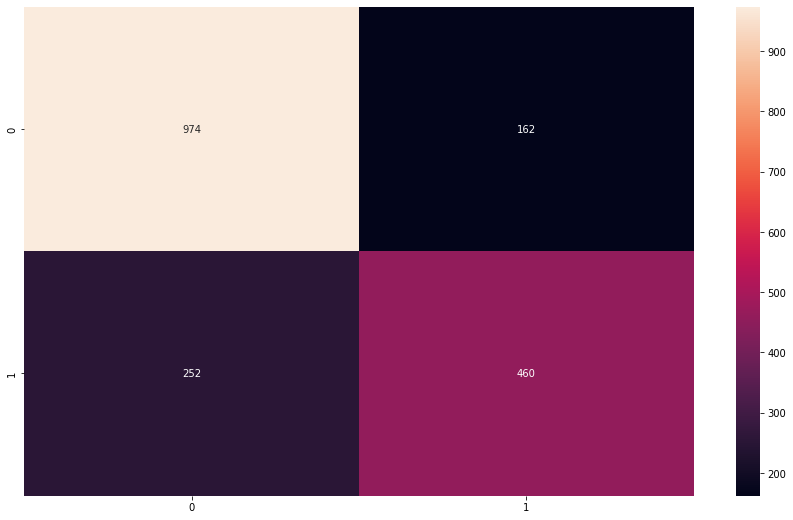

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
yp=lr.predict(xte)
plt.figure(figsize=(15,9))
sns.heatmap(confusion_matrix(yte,yp),annot=True,fmt='d')

**Observations**
* No of TP - 460
* No of FP - 252
* No of TN - 974
* No of FN - 162

* Accuracy Score

In [ ]:
print(accuracy_score(yte,yp))

0.775974025974026


* Classification Report

In [ ]:
print(classification_report(yte,yp))

              precision    recall  f1-score   support

          No       0.79      0.86      0.82      1136
         Yes       0.74      0.65      0.69       712

    accuracy                           0.78      1848
   macro avg       0.77      0.75      0.76      1848
weighted avg       0.77      0.78      0.77      1848



**Using Random Forest Classifier**

* Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_depth' : [3,5,7],
}

In [ ]:
rfc=RandomForestClassifier(criterion='gini')
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(xtrd, ytr)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500]})

In [ ]:
model=CV_rfc.best_estimator_.fit(xtrd,ytr)

Feature ranking:
1. feature 10 (0.355075)
2. feature 12 (0.167456)
3. feature 3 (0.135737)
4. feature 5 (0.111028)
5. feature 6 (0.109856)
6. feature 9 (0.033765)
7. feature 11 (0.029861)
8. feature 7 (0.026763)
9. feature 1 (0.022403)
10. feature 2 (0.004425)
11. feature 0 (0.002959)
12. feature 4 (0.000610)
13. feature 8 (0.000062)


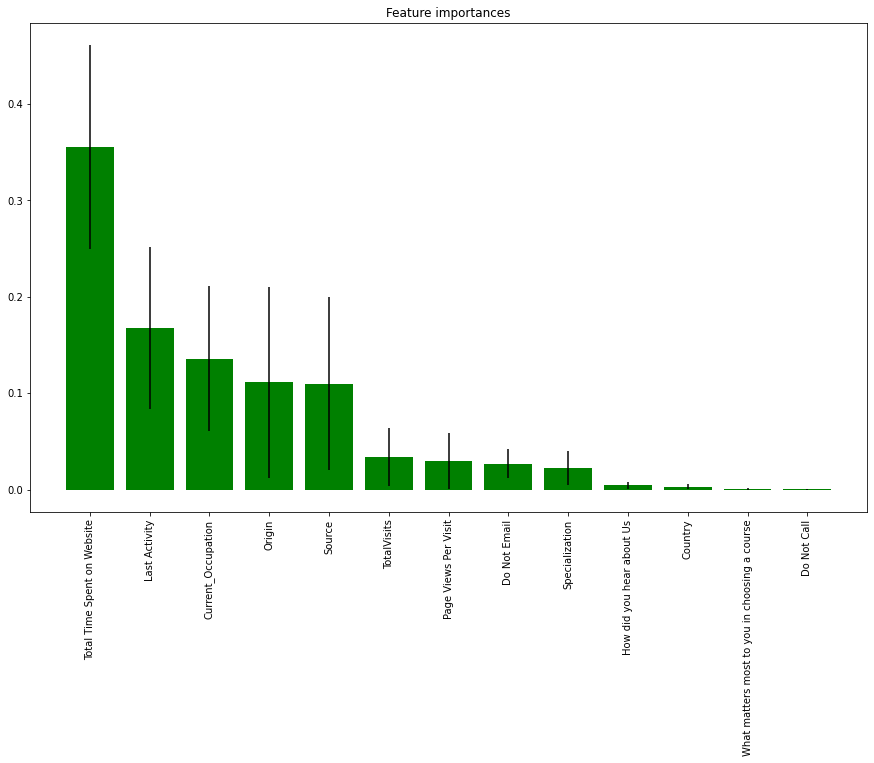

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(xtrd.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(15, 9))
plt.title("Feature importances")
plt.bar(range(xtrd.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(xtrd.shape[1]), xtrd.columns[indices],rotation=90)
plt.xlim([-1, xtrd.shape[1]])
plt.show()

In [ ]:
xtrd.columns

Index(['Country', 'Specialization', 'How did you hear about Us',
       'Current_Occupation', 'What matters most to you in choosing a course',
       'Origin', 'Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity'],
      dtype='object')

In [ ]:
xtr=xtrd[['Total Time Spent on Website','Last Activity','Current_Occupation','Origin','Source']]
xte=xted[['Total Time Spent on Website','Last Activity','Current_Occupation','Origin','Source']]

In [ ]:
rf=CV_rfc.best_estimator_.fit(xtr,ytr)
rf.fit(xtr,ytr)

RandomForestClassifier(max_depth=7, n_estimators=300)

**Evaluating Random Forest Model**

* Confusion Matrix

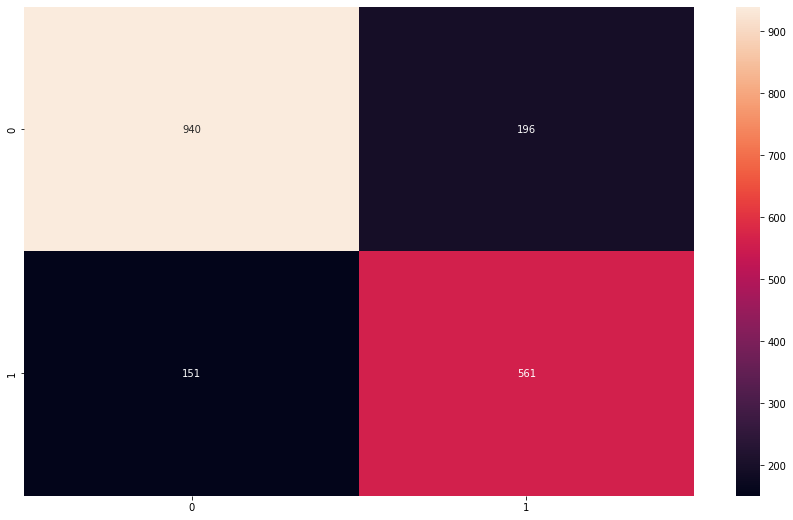

In [ ]:
yh=rf.predict(xte)
plt.figure(figsize=(15,9))
sns.heatmap(confusion_matrix(yte,yh),annot=True,fmt='d')

Observations

* No of TP - 561
* No of FP - 151
* No of TN - 940
* No of FN - 196

* Accuracy Score

In [ ]:
print(accuracy_score(yte,yh))

0.8122294372294372


* Classification Report

In [ ]:
print(classification_report(yte,yh))

              precision    recall  f1-score   support

          No       0.86      0.83      0.84      1136
         Yes       0.74      0.79      0.76       712

    accuracy                           0.81      1848
   macro avg       0.80      0.81      0.80      1848
weighted avg       0.82      0.81      0.81      1848



**Notes:**

Random Forest has a slight improvement in model accuracy and in some cases model performance.